In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("income.csv")

In [3]:
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


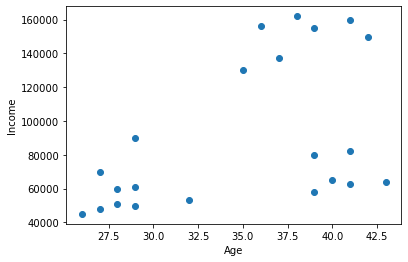

In [4]:
plt.scatter(df['Age'], df['Income($)'])
plt.xlabel("Age")
plt.ylabel("Income")
plt.show()

In [5]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters =3)
y_predicted = km.fit_predict(df[['Age', 'Income($)']])
print(y_predicted)

[2 2 0 0 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 2 2 0]


In [6]:
df["cluster"] = y_predicted

In [7]:
df.head()

,Name,Age,Income($),cluster
0,Rob,27,70000,2
1,Michael,29,90000,2
2,Mohan,29,61000,0
3,Ismail,28,60000,0
4,Kory,42,150000,1


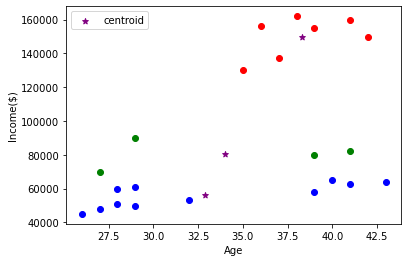

In [10]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1.Age,df1['Income($)'],color='blue')
plt.scatter(df2.Age,df2['Income($)'],color='red')
plt.scatter(df3.Age,df3['Income($)'],color='green')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('Age')
plt.ylabel('Income($)')
plt.legend()
plt.show()

In [11]:
from sklearn.preprocessing import MinMaxScaler

In [12]:
scaler = MinMaxScaler()
scaler.fit(df[['Age']])
df['Age'] = scaler.transform(df[['Age']])
scaler.fit(df[['Income($)']])
df['Income($)'] = scaler.transform(df[['Income($)']])

In [13]:
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,2
1,Michael,0.176471,0.384615,2
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1


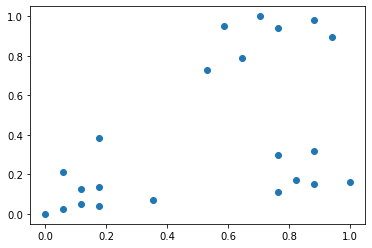

In [14]:
plt.scatter(df["Age"], df['Income($)'])
plt.show()

In [16]:
km = KMeans(n_clusters = 3)
y_predicted = km.fit_predict(df[['Age','Income($)']])
print(y_predicted)

[1 1 1 1 0 0 0 0 0 0 0 1 1 1 1 1 2 2 2 2 2 2]


In [18]:
df['cluster']=y_predicted

In [19]:
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,1
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,0


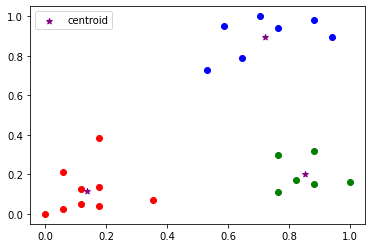

In [20]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1.Age,df1['Income($)'],color='blue')
plt.scatter(df2.Age,df2['Income($)'],color='red')
plt.scatter(df3.Age,df3['Income($)'],color='green')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.legend()
plt.show()